In [ ]:
"""
    INSIGHTS DERIVED
    
    - The average recovery time from this dataset is 23.3 days (~3.3 weeks) for the patients in Korea
""" 

In [1]:
patient_info = "./korea_dataset/PatientInfo.csv"

In [2]:
import pandas as pd

In [33]:
df = pd.read_csv(patient_info, encoding="utf-8")
print(df.head())

   patient_id  global_num     sex  birth_year  age country province  \
0  1000000001         2.0    male      1964.0  50s   Korea    Seoul   
1  1000000002         5.0    male      1987.0  30s   Korea    Seoul   
2  1000000003         6.0    male      1964.0  50s   Korea    Seoul   
3  1000000004         7.0    male      1991.0  20s   Korea    Seoul   
4  1000000005         9.0  female      1992.0  20s   Korea    Seoul   

          city disease        infection_case  infection_order   infected_by  \
0   Gangseo-gu     NaN       overseas inflow              1.0           NaN   
1  Jungnang-gu     NaN       overseas inflow              1.0           NaN   
2    Jongno-gu     NaN  contact with patient              2.0  2.002000e+09   
3      Mapo-gu     NaN       overseas inflow              1.0           NaN   
4  Seongbuk-gu     NaN  contact with patient              2.0  1.000000e+09   

   contact_number symptom_onset_date confirmed_date released_date  \
0            75.0            

In [19]:
df.drop("country", axis=1, inplace=True)
df.drop("province", axis=1, inplace=True)
print(df.head())

   patient_id  global_num     sex  birth_year  age         city disease  \
0  1000000001         2.0    male      1964.0  50s   Gangseo-gu     NaN   
1  1000000002         5.0    male      1987.0  30s  Jungnang-gu     NaN   
2  1000000003         6.0    male      1964.0  50s    Jongno-gu     NaN   
3  1000000004         7.0    male      1991.0  20s      Mapo-gu     NaN   
4  1000000005         9.0  female      1992.0  20s  Seongbuk-gu     NaN   

         infection_case  infection_order   infected_by  contact_number  \
0       overseas inflow              1.0           NaN            75.0   
1       overseas inflow              1.0           NaN            31.0   
2  contact with patient              2.0  2.002000e+09            17.0   
3       overseas inflow              1.0           NaN             9.0   
4  contact with patient              2.0  1.000000e+09             2.0   

  symptom_onset_date confirmed_date released_date deceased_date     state  
0         2020-01-22     202

In [23]:
print(df["state"].value_counts())

isolated    1934
released    1133
deceased      61
Name: state, dtype: int64


In [54]:
#df["confirmed_date"].isnull()

2020-01-23


In [73]:
from datetime import datetime

import math

date_format = "%Y-%m-%d"

recovery_duration = []

checkin = None
released = None

for i in range(len(df["confirmed_date"])):
    confirm = df["confirmed_date"][i]
    release = df["released_date"][i]
    
    checkin = datetime.strptime(confirm, date_format)
    
    try:
        if (math.isnan(release)):
            released = datetime.strptime(datetime.today().strftime('%Y-%m-%d'), date_format)
            recovery_duration.append((released - checkin).days)
    except:    
        released = datetime.strptime(release, date_format)
        duration = released - checkin
        
        recovery_duration.append(duration.days)
            

#print(recovery_duration)
        

In [75]:
df["recovery_period"] = recovery_duration

In [76]:
#print(df["recovery_period"])
print(df["recovery_period"].mean())

23.695652173913043


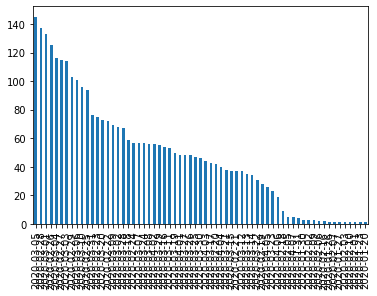

In [92]:
import matplotlib.pyplot as plt

#%matplotlib.inline

#bin_range = df[""]

counter = df["confirmed_date"].value_counts()
bin_range = (counter.max() - counter.min())/8

#print(type(counter))

counter.plot("bar")
plt.show()

#plt.hist()

In [13]:
df["disease"].isnull().values.any()

True

In [20]:
length = len(df["infection_case"]) # 3128
count = df["infection_case"].isnull().sum()
print(length, count) # disease: 3128 3110

# infection_case 3128 819

3128 819


In [67]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#df["infection_case"] = le.fit_transform(df["infection_case"].astype(str))
df = df.fillna("")
df["infection_case"].replace(np.nan, "--", regex=True)

diff_infection = np.unique(df["infection_case"])
diff_infection
#print(df["infection_case"][745])

array(['', 'Bonghwa Pureun Nursing Home', 'Changnyeong Coin Karaoke',
       'Cheongdo Daenam Hospital', 'Dongan Church',
       "Eunpyeong St. Mary's Hospital", 'Geochang Church',
       'Guro-gu Call Center', 'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Gyeongsan Seorin Nursing Home',
       'Milal Shelter', 'Ministry of Oceans and Fisheries',
       'Onchun Church', 'Pilgrimage to Israel',
       'River of Grace Community Church', 'Seongdong-gu APT',
       'Shincheonji Church', 'Suyeong-gu Kindergarten',
       'contact with patient', 'etc', 'gym facility in Cheonan',
       'gym facility in Sejong', 'overseas inflow'], dtype=object)

In [64]:
diff_cities = np.unique(df["city"])
diff_cities

array(['', 'Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Chilgok-gun', 'Chuncheon-si', 'Chungju-si', 'Daedeok-gu',
       'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongducheon-si', 'Dongjak-gu', 'Dongnae-gu',
       'Eumseong-gun', 'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu',
       'Gangnam-gu', 'Gangneung-si', 'Gangseo-gu', 'Gapyeong-gun',
       'Geochang-gun', 'Geoje-si', 'Geumcheon-gu', 'Geumjeong-gu',
       'Gijang-gun', 'Gimcheon-si', 'Gimhae-si', 'Gimje-si', 'Gimpo-si',
       'Goesan-gun', 'Goryeong-gun', 'Goseong-gun', 'Goyang-si',
       'Gumi-si', 'Gunpo-si', 'Gunsan-si', 'Gunwi-gun', 'Guri-si',
       'Guro-gu', 'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu', 'Gwangju-si',
       'Gwangmyeong-si', 'Gwangya

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
infection_labels = le.fit_transform(df["infection_case"])
infection_mappings = {index: label for index, label in enumerate(le.classes_)}

infection_mappings

{0: '',
 1: 'Bonghwa Pureun Nursing Home',
 2: 'Changnyeong Coin Karaoke',
 3: 'Cheongdo Daenam Hospital',
 4: 'Dongan Church',
 5: "Eunpyeong St. Mary's Hospital",
 6: 'Geochang Church',
 7: 'Guro-gu Call Center',
 8: 'Gyeongsan Cham Joeun Community Center',
 9: 'Gyeongsan Jeil Silver Town',
 10: 'Gyeongsan Seorin Nursing Home',
 11: 'Milal Shelter',
 12: 'Ministry of Oceans and Fisheries',
 13: 'Onchun Church',
 14: 'Pilgrimage to Israel',
 15: 'River of Grace Community Church',
 16: 'Seongdong-gu APT',
 17: 'Shincheonji Church',
 18: 'Suyeong-gu Kindergarten',
 19: 'contact with patient',
 20: 'etc',
 21: 'gym facility in Cheonan',
 22: 'gym facility in Sejong',
 23: 'overseas inflow'}

In [74]:
df["infection_label"] = infection_labels
df[["infection_case", "infection_label"]].iloc[1:10]

,infection_case,infection_label
1,overseas inflow,23
2,contact with patient,19
3,overseas inflow,23
4,contact with patient,19
5,contact with patient,19
6,contact with patient,19
7,overseas inflow,23
8,overseas inflow,23
9,contact with patient,19


In [91]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
infection_labels = infection_labels.reshape(len(infection_labels), 1)
infection_OHE = encoder.fit_transform(infection_labels)
#infection_feature_arr = encoder.fit_transform(df[["infection_labels"]]).toarray()
#infection_feature_label = [str(cls_label) for cls_label in le.classes_]
#infection_features = pd.DataFrame(infection_feature_arr, columns=infection_feature_label)

df["infection_OHE"] = infection_OHE
df[["infection_case", "infection_label", "infection_OHE"]].iloc[10:20]
# df["infection_OHE"].value_counts() -> 0.0 2309       1.0 819

C:\Users\William Law\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,infection_case,infection_label,infection_OHE
10,overseas inflow,23,0.0
11,overseas inflow,23,0.0
12,contact with patient,19,0.0
13,contact with patient,19,0.0
14,Seongdong-gu APT,16,0.0
15,contact with patient,19,0.0
16,contact with patient,19,0.0
17,etc,20,0.0
18,contact with patient,19,0.0
19,Seongdong-gu APT,16,0.0


In [95]:
import seaborn as sns
